In [1]:
import numpy as np

class ProjectedGradientDescent:
    def __init__(self, D_init, theta_init, b, x, y, alphas, lambda_0, lambda_1, lambda_2, lr=0.01, max_iter=1000, tol=1e-6):
        self.D = D_init.copy()
        self.theta = theta_init.copy()
        self.b = b
        self.x = x
        self.y = y
        self.alphas = alphas
        self.lambda_0 = lambda_0
        self.lambda_1 = lambda_1
        self.lambda_2 = lambda_2
        self.lr = lr
        self.max_iter = max_iter
        self.tol = tol
        self.history = []

    @staticmethod
    def compute_gradient_theta(theta, b, y, alphas, lambda_2):
        grad_theta = 2 * lambda_2 * theta
        for i in range(len(y)):
            grad_theta += 2 * alphas[i] * (np.dot(theta, alphas[i]) + b - y[i])
        return grad_theta

    @staticmethod
    def compute_gradient_D(D, x, alphas, lambda_0):
        grad_D = np.zeros_like(D)
        for i in range(len(x)):
            grad_D -= 2 * lambda_0 * np.outer((x[i] - np.dot(D, alphas[i])), alphas[i])
        return grad_D

    @staticmethod
    def project_D(D):
        norm_D = np.linalg.norm(D)
        if norm_D > 1:
            D /= norm_D
        return D

    def objective(self):
        S = 0
        for i in range(len(self.y)):
            reconstruction_error = self.lambda_0 * np.linalg.norm(self.x[i] - np.dot(self.D, self.alphas[i])) ** 2
            prediction_error = np.linalg.norm(self.y[i] - (np.dot(self.theta, self.alphas[i]) + self.b)) ** 2
            sparsity_penalty = self.lambda_1 * np.linalg.norm(self.alphas[i], 1)
            S += prediction_error + reconstruction_error + sparsity_penalty
        regularization = self.lambda_2 * np.linalg.norm(self.theta) ** 2
        return S + regularization

    def optimize(self):
        for iter in range(self.max_iter):
            grad_theta = self.compute_gradient_theta(self.theta, self.b, self.y, self.alphas, self.lambda_2)
            grad_D = self.compute_gradient_D(self.D, self.x, self.alphas, self.lambda_0)
            grad_b = 2 * self.b * len(self.y)

            # Gradient updates
            self.theta -= self.lr * grad_theta
            self.b -= self.lr * grad_b
            self.D -= self.lr * grad_D

            # Project D onto the feasible set
            self.D = self.project_D(self.D)

            # Compute objective and check convergence
            obj_value = self.objective()
            self.history.append(obj_value)

            if iter > 0 and abs(self.history[-1] - self.history[-2]) < self.tol:
                break

        return self.D, self.theta, self.b, self.history


Optimized D: [[-0.04086495 -0.16963985 -0.1758974   0.07614538  0.17002192  0.15260052
  -0.04233854 -0.06520747  0.08247951 -0.0677629 ]
 [-0.03163288 -0.04096066 -0.0162333   0.02873578 -0.08631486  0.00865244
   0.10381056  0.15201958  0.0791705  -0.09744903]
 [ 0.02103939  0.00577834  0.02313943  0.00642912  0.12752625  0.00861574
  -0.22078225 -0.23308482 -0.02642205  0.11458777]
 [-0.05138884  0.16428264  0.20764348  0.0041656  -0.17144514 -0.17323736
   0.01931276  0.14424912  0.03955871  0.04459494]
 [-0.01046998 -0.05418957  0.01168579  0.03866377  0.08913148  0.04761674
  -0.05105859 -0.01806132  0.0863538  -0.0406112 ]
 [ 0.26720979 -0.02391951  0.17747717 -0.15765116  0.00259509  0.04752959
  -0.01860291 -0.09696711 -0.04350447 -0.09137378]
 [-0.20727836  0.1069846  -0.06382246  0.09452482  0.18186217 -0.04451487
   0.07008133  0.08224959 -0.01327583  0.1038776 ]
 [-0.11750457  0.01710436 -0.18589567  0.0448359   0.10421217  0.01591898
   0.03374054 -0.03644094 -0.09682957 

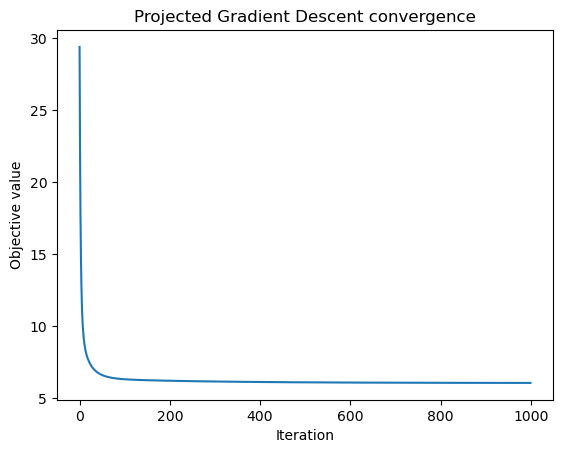

In [2]:
# Example usage
np.random.seed(42)
m, n_features = 5, 10
D_init = np.random.randn(n_features, n_features)
theta_init = np.random.randn(n_features)
b = 0
x = np.random.randn(m, n_features)
y = np.random.randn(m)
alphas = np.random.randn(m, n_features)  # Replace with precomputed alphas

lambda_0, lambda_1, lambda_2 = 0.1, 0.1, 0.1

pgd = ProjectedGradientDescent(D_init, theta_init, b, x, y, alphas, lambda_0, lambda_1, lambda_2)
D_opt, theta_opt, b_opt, history = pgd.optimize()

print("Optimized D:", D_opt)
print("Optimized theta:", theta_opt)

# Plot convergence
import matplotlib.pyplot as plt
plt.plot(history)
plt.xlabel("Iteration")
plt.ylabel("Objective value")
plt.title("Projected Gradient Descent convergence")
plt.show()
